In [1]:
import pandas as pd
import numpy as np

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:112: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
df= pd.read_csv("SMSSpamCollection.csv", sep='\t', names=['label', 'messages'])

In [3]:
df

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
!pip install nltk

In [5]:
df.duplicated().sum()

403

In [6]:
df.drop_duplicates(keep='first', inplace=True)

In [7]:
df.isnull().sum()

label       0
messages    0
dtype: int64

In [8]:
df.messages[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
#nltk.data.path.append("corpora")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [11]:
lemmatizer = WordNetLemmatizer()


In [12]:
def text_preprocessing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [i for i in text if i not in stopwords.words('english')]
    text = [i for i in text if i not in string.punctuation]
    text = [i for i in text if i.isalnum()]
    text = [lemmatizer.lemmatize(i) for i in text]
    return " ".join(text)
    

In [13]:
df['Transformed_Message'] = df['messages'].apply(text_preprocessing)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

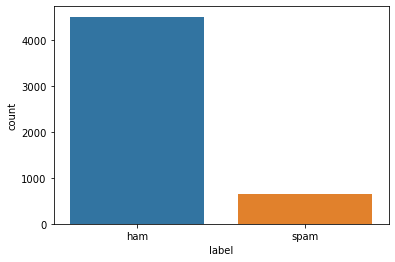

In [15]:
sns.countplot(x='label',data=df)
plt.show()

In [16]:
temp_1 = pd.get_dummies(df['label'],drop_first=True)

In [17]:
df = pd.concat([df, temp_1], axis=1)
df.drop(columns='label', inplace=True)
df= df.rename({'spam':'target'}, axis=1)

In [18]:
df.head()

,messages,Transformed_Message,target
0,"Go until jurong point, crazy.. Available only ...",go jurong point available bugis n great world ...,0
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,0


In [19]:
x = df['Transformed_Message']
x.head()
y = df['target'].values


In [20]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = TfidfVectorizer()
X = pd.DataFrame(cv.fit_transform(df['Transformed_Message']).toarray())

In [21]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [24]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_train,y_train)
X_res.shape,y_res.shape
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 4516, 1: 653})
Resampled dataset shape Counter({0: 3053, 1: 3053})


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.model_selection import cross_val_score

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
accuracy_GNB = cross_val_score(classifier, X_test, y_test, cv=5)
classifier.fit(X_res, y_res)
y_pred1 = classifier.predict(X_test)

print("Confusion Matrix", confusion_matrix(y_test,y_pred1))
print("Precision Score",precision_score(y_test,y_pred1))
print("Accuracy Score:",np.mean(accuracy_GNB))

Confusion Matrix [[1292  171]
 [  35  208]]
Precision Score 0.5488126649076517
Accuracy Score: 0.8845449400627668


In [27]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
MNB = MultinomialNB()
accuracy_MNB = cross_val_score(MNB, X_test, y_test, cv=5)
MNB.fit(X_res, y_res)
y_pred2 = MNB.predict(X_test)

print("Confusion Matrix", confusion_matrix(y_test,y_pred2))
print("Precision Score",precision_score(y_test,y_pred2))
print("Accuracy Score:",np.mean(accuracy_MNB))

Confusion Matrix [[1413   50]
 [  12  231]]
Precision Score 0.8220640569395018
Accuracy Score: 0.910323952598995


In [28]:
BNB = BernoulliNB()
accuracy_BNB = cross_val_score(BNB, X_test, y_test, cv=5)
BNB.fit(X_res, y_res)
y_pred3 = BNB.predict(X_test)

print("Confusion Matrix", confusion_matrix(y_test,y_pred3))
print("Precision Score",precision_score(y_test,y_pred3))
print("Accuracy Score:",np.mean(accuracy_BNB))

Confusion Matrix [[1463    0]
 [  34  209]]
Precision Score 1.0
Accuracy Score: 0.8939102399204266


In [29]:
modelling_score = pd.DataFrame({
    'Model': ['GaussianNB','MultinomialNB','BernoulliNB'],
    'Accuracy_Score_res': [np.mean(accuracy_GNB), np.mean(accuracy_MNB), np.mean(accuracy_BNB)],
    'Precision_Score_res': [precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),precision_score(y_test,y_pred3)]})

In [31]:
new_df = modelling_score.sort_values(by=['Accuracy_Score_res','Precision_Score_res'], ascending=False)
new_df

,Model,Accuracy_Score_res,Precision_Score_res
1,MultinomialNB,0.910324,0.822064
2,BernoulliNB,0.893910,1.000000
0,GaussianNB,0.884545,0.548813


In [32]:
cm_GNB = confusion_matrix(y_test, y_pred1)
cm_MNB = confusion_matrix(y_test, y_pred2)
cm_BNB = confusion_matrix(y_test, y_pred3)

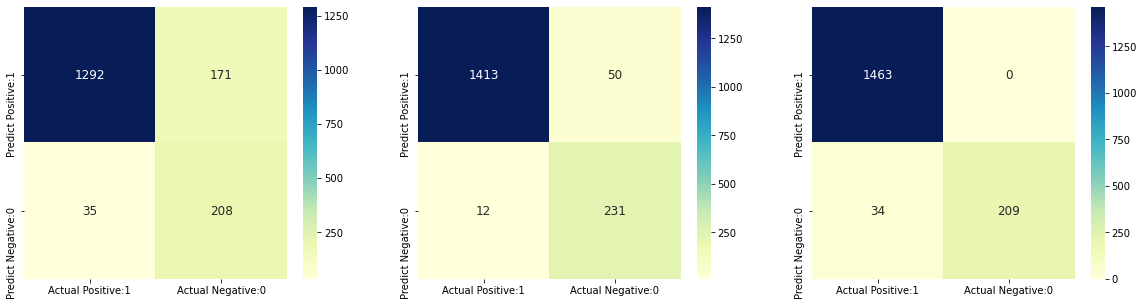

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20,5), ncols=3, nrows=1)

cm_matrix_GNB = pd.DataFrame(data=cm_GNB, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_GNB,ax=ax1, annot=True, fmt='d', cmap='YlGnBu',annot_kws={"size": 12})

cm_matrix_MNB = pd.DataFrame(data=cm_MNB,columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_MNB,ax=ax2, annot=True, fmt='d', cmap='YlGnBu',annot_kws={"size": 12})

cm_matrix_BNB = pd.DataFrame(data=cm_BNB, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_BNB,ax=ax3, annot=True, fmt='d', cmap='YlGnBu',annot_kws={"size": 12})

plt.show()

In [34]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(BNB,open('model.pkl','wb'))